# Music and waves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import Audio

In [2]:
def play(freq, duration=1):
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data = np.sin(2 * np.pi * freq * t)
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency = {freq} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)     # play sound

Mathematically, a sine wave is defined as:
$$y(t) = A \sin (2 \pi f t)$$

Frequency $f$ is measured in hertz (Hz), or complete cycles per second.

The sound is produced by air vibrations.

In [3]:
from IPython.display import HTML
HTML("""
<video width="480" height="360" controls>
    <source src="haute-parleur.MOV">
</video>
""")

Play a single freqeuncy of 1000 Hz.

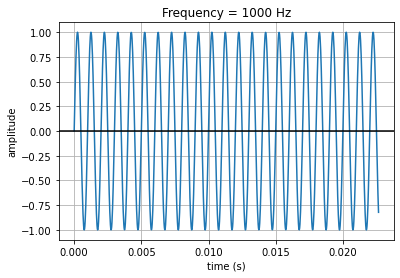

In [4]:
play(freq=1000, duration=1)   # play a sound for 1 second

Listen to different frequencies.

In [5]:
def sine_wave_wd(Frequency=1000):
    duration = 1
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data = np.sin(2 * np.pi * Frequency * t)
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency = {Frequency} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)

widgets.interact(sine_wave_wd, Frequency=(50, 20_000, 10));


interactive(children=(IntSlider(value=1000, description='Frequency', max=20000, min=50, step=10), Output()), _…

This is also what distinguishes music from noise. Instead of generating a regular sine wave with a single frequency, what if we just generated a signal with random numbers?

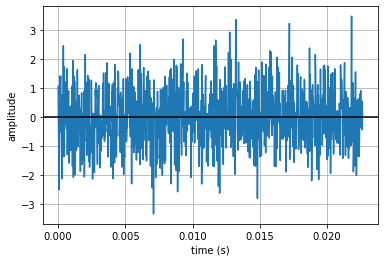

In [6]:
duration = 1
framerate = 44100   # <- rate of sampling
t = np.linspace(0, duration, framerate * duration)

data = np.random.randn(framerate * duration)

fig, ax = plt.subplots()
ax.plot(t[:1000], data[:1000])
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.set(xlabel='time (s)',
       ylabel='amplitude')
plt.show()

Audio(data, rate=44100, autoplay=True)

# Music and Multiplication
Previously we saw a sine wave visualized in regular cycles. When we think in terms of cycles per second, it means that for a given root frequency $f$, any power of 2 times $f$ will generate sine waves that start and end together.

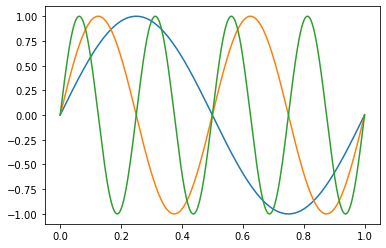

In [7]:
duration = 1

framerate = 44100   # <- rate of sampling
t = np.linspace(0, duration, framerate * duration)    # time values

fig, ax = plt.subplots()
ax.plot(t, np.sin(2 * np.pi * 1 * t))
ax.plot(t, np.sin(2 * np.pi * 2 * t))
ax.plot(t, np.sin(2 * np.pi * 4 * t))
plt.show()

Play the three sounds below. Did you hear that? Sounds like they have the same “quality”, just at a higher or lower level right? In music, we call the quality a "note" and the distance between these powers of two an “octave”. Now, if you still remember your Greek/Latin word roots, you should immediately be saying, “aha, octave means 8!” Indeed if you played a piano keyboard, you’ll see that there are 8 white keys between two keys of the same letter, representing that they’re of the same base frequency but differ by a power of 2.

Let's listen to a frequency $f$.

![Frequencies of A (Do) of musical nstruments](freq_music_instrum.png)

bass


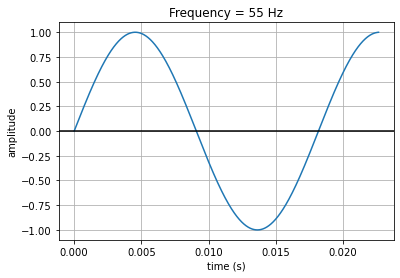

In [25]:
freq = 55
print("bass")
play(2**0 * freq) # any base frequency

Now listen to frequency $2f$.

tuba


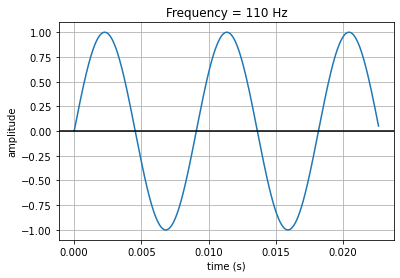

In [26]:
print("tuba")
play(2**1 * freq)

Now listen to frequency $2^2f = 4f$.

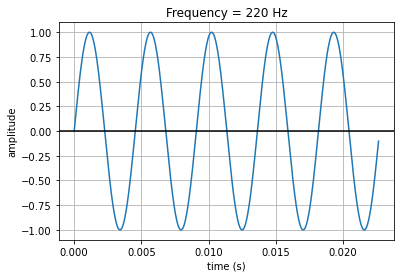

In [27]:
print("celo")
play(2**2 * freq)

And now listen to frequency $2^3f = 8f$.

violin


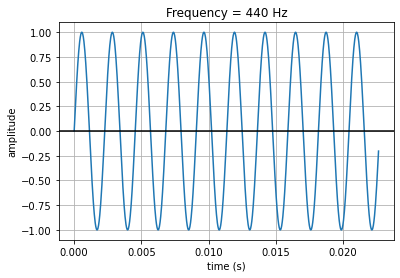

In [28]:
print("violin")
play(2**3 * freq)

Sounds that are separated by double the frequancy form a **scale**. For exemple, 220 Hz and 440 Hz form A major scale (Do major). 

Let's add the same note separated by an octave.

In [12]:
def sine_waves_3_wd(Frequency):
    duration = 1
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data0 = np.sin(2**0 * np.pi * Frequency * t)
    data1 = np.sin(2**1 * np.pi * Frequency * t)
    data2 = np.sin(2**2 * np.pi * Frequency * t)
    data3 = np.sin(2**3 * np.pi * Frequency * t)
    
    data = data0 + data1 + data2 + data3
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency =\
    {Frequency} + {2*Frequency} + {4*Frequency} + {8*Frequency} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)

widgets.interact(sine_waves_3_wd, Frequency=(50, 500));

interactive(children=(IntSlider(value=275, description='Frequency', max=500, min=50), Output()), _dom_classes=…

# Other notes

So where do the other notes come from? We can multiple numbers other than 2! You can play multiples of 3 or 5 to see how the sound changes.

Play a sound with frequency $3f$.

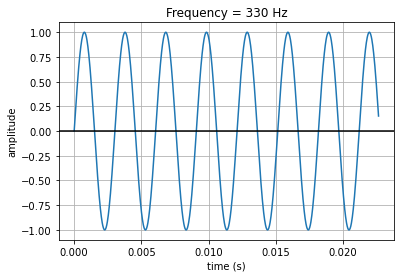

In [13]:
play(3 * freq)

Play a sound with frequency $5f$.

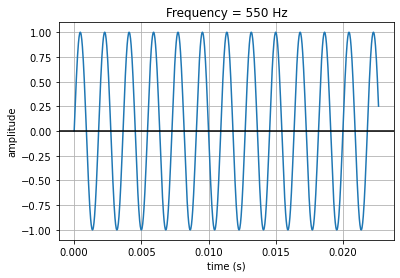

In [14]:
play(5 * freq)

# Musical notes

Increase a half tone is equavalent to multiplying by $r$ ([link](https://www.deleze.name/marcel/physique/musique/Frequences.pdf)). Since an octave has 12 demi-tones and an octave doubles the fquency, then:
$$ 2 = r^12$$
or $r = 2^{1/12}$.

The frequency of a note is :

$$f_n = f_0 r^n$$

where:

- $f_n$ - the frequency of the note, Hz;
- $f_0$ - the root frequency, Hz;
- $r = 2^{1/12}$ - the number which multiplied by itself 12 times equals 2.

[Game de Zarlino](https://www.assistancescolaire.com/eleve/1re/enseignement-scientifique/reviser-le-cours/1_sci_29) or [Five-limit tuning](https://en.wikipedia.org/wiki/Five-limit_tuning) ($r = 2^{1/12}$ ):

|Note             |A=Do |B=Re|C=Mi |D=Fa |E=Sol|F=La |G=Sil   |A=Do|
|-----------------|-----|----|-----|-----|-----|-----|--------|----|
|Theoretical ratio| 1   |$r$ |$r^4$|$r^5$|$r^7$|$r^9$|$r^{11}$|2   |
|Zarlino ratio    | 1   |9/8 |5/4  |4/3  | 3/2 | 5/3 |15/8    |2   |
|Pythagore ratio  | 1   |9/8 |81/64|4/3  | 3/2 |27/16|243/128 |2   |

 

In [53]:
slider = widgets.IntSlider(value=220,
                           min=110,
                           max=1100,
                           step=110,
                           description="Frequency")
display(slider)

IntSlider(value=220, description='Frequency', max=1100, min=110, step=110)

Do - a deer, a female deer

Do --> A: the tonic


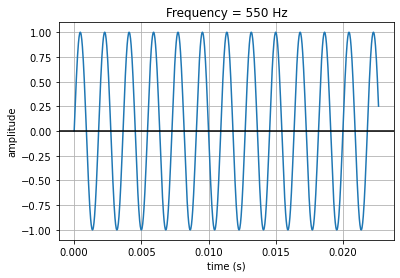

In [52]:
# root = 220
root = slider.value
do = lambda X: X
print("Do --> A: the tonic")
play (do (root))

Re - a drop of golden sunnnnn

Re


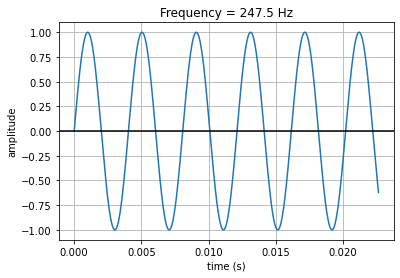

In [17]:
re = lambda x: x * 9 / 8
print("Re")
play(re(root))   #"major second"

Mi - a name I call myself

Mi -- > C#: mediant


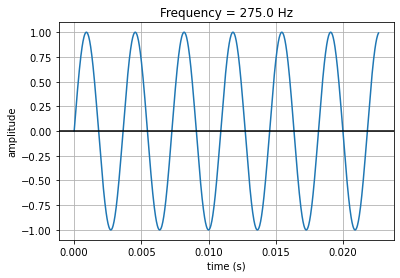

In [18]:
mi = lambda x: x * 5 / 4
print("Mi -- > C#: mediant")
play(mi (root)) # "major third"

Fa - a long, long way to run

Fa


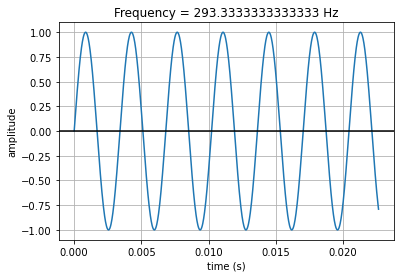

In [19]:
fa = lambda x: x * 4 / 3
print("Fa")
play(fa(root)) # "perfect fourth"

Sol - A needle pullina thread

Sol --> E: the dominant in the scale


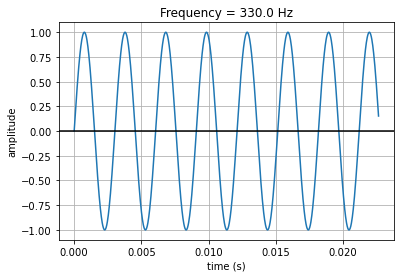

In [20]:
sol = lambda x: x * 3 / 2
print("Sol --> E: the dominant in the scale")
play(sol(root)) # "perfect fifth"

La - a note to follow so

La


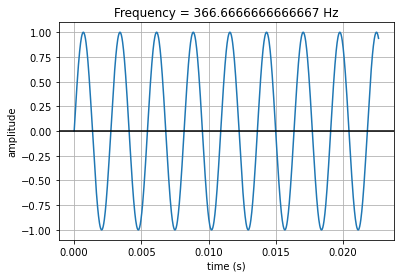

In [21]:
la = lambda x: x * 5 / 3
print("La")
play(la(root))  # "major sixth"

Ti - a drink with jam and bread

Si


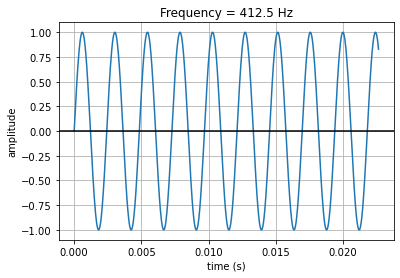

In [22]:
si = lambda x: x * 15 / 8
print("Si")
play(si(root)) # "major seventh"

That will bring us back to Do, oh, oh, oh

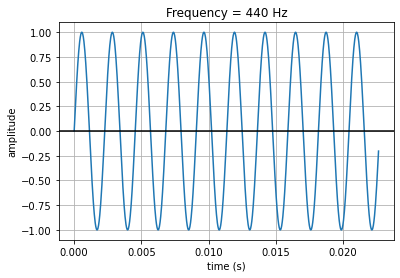

In [23]:
play(do(root * 2))

# Combining three sine waves

In [24]:
def sine_waves_3_wd(freq0=1000, freq1=2000, freq2=4000):
    duration = 1
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data0 = np.sin(2 * np.pi * freq0 * t)
    data1 = np.sin(2 * np.pi * freq1 * t)
    data2 = np.sin(2 * np.pi * freq2 * t)
    
    data = data0 + data1 + data2
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency = {freq} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)

widgets.interact(sine_waves_3_wd, freq0=(50, 5000), freq1=(50, 5000), freq2=(50, 5000));

interactive(children=(IntSlider(value=1000, description='freq0', max=5000, min=50), IntSlider(value=2000, desc…

# References

[Making Music](https://blog.changshe.io/making-music-in-a-jupyter-notebook-19c57791e636), Medium

[La gamme tempérée](https://www.assistancescolaire.com/eleve/1re/enseignement-scientifique/reviser-le-cours/1_sci_29), assistance scolaire personnalisée

[Widgets](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916), Medium

[Introduction to widgets video](https://www.youtube.com/watch?v=wb6k_T4rKBQ), Youtube

[Introduction to widgets GitHub](https://github.com/kimfetti/Videos/blob/master/ipywidgets/01_ipywidgets_intro.ipynb)

[How to Create an Interactive Web Application using a Jupyter Notebook](https://www.youtube.com/watch?v=t8P6estGusQ), Youtube

[-- " --, blog](https://blog.finxter.com/how-to-create-an-interactive-web-application-using-jupyter-notebook/)

[-- " --, Github](https://github.com/nghweigeok/jupyter_webapp_demo)

[Sound Harmonics and Frequency](https://www.youtube.com/watch?v=MVtm5BX5lfs), Youtube

[Calculate Frequencies of Musical Notes with JavaScript - Part 1](https://www.youtube.com/watch?v=XCVY8eVwfvI), Youtube

[Émission et perception d'un son](https://www.assistancescolaire.com/eleve/2nde/physique-chimie/reviser-le-cours/2_ph_09), assistance scolaire personnalisée